## Waste Management using CNN Model

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# pip install tensorflow

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [6]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [8]:
# Visualization
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})        

100%|██████████| 9999/9999 [02:09<00:00, 76.94it/s]


In [9]:
data.shape

(22564, 2)

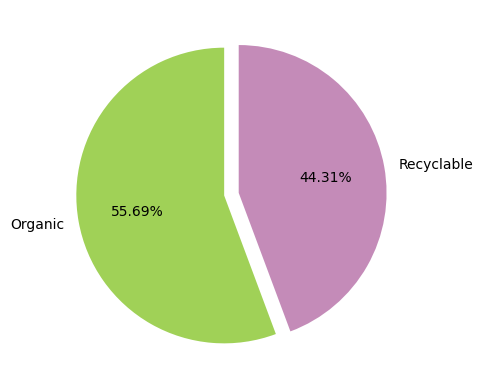

In [10]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors = colors, startangle = 90, explode=[0.05, 0.05])
plt.show()

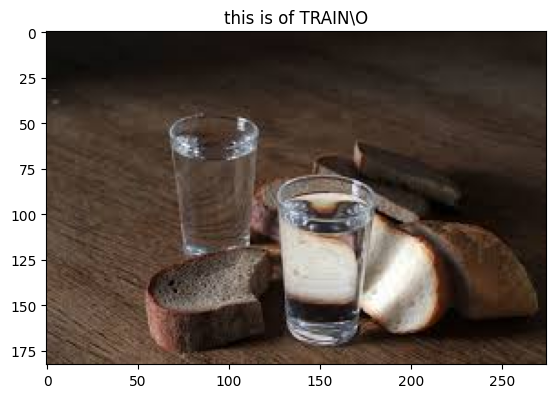

In [11]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(1%12)+1)
    index = np.random.randint(15000)
    plt.title('this is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

# Define the model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(384, 512, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

          

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 382, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 191, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 189, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 94, 126, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 92, 124, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 46, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 365056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    93,454,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,564,418 (356.92 MB)

 Trainable params: 93,564,418 (356.92 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(384, 512),
    batch_size=256,
    color_mode='rgb',
    class_mode='categorical'

)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(384, 512),
    batch_size=256,
    color_mode='rgb',
    class_mode='categorical'
    
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [17]:
model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

In [18]:
pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/ff/ba/31c7a8131152822b3a2cdeba76398ffb404d81d640de98287d236da90c49/scipy-1.15.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 108.9 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/60.8 kB 108.9 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/60.8 kB 108.9 kB/s eta 0:00:01
     ------------------- ------------------- 30.7/60.8 kB 93.5 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 179.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/43.6 MB 960.0 kB/s eta 0:00:46
   ------------------------

In [ ]:
hist = model.fit(
    train_generator,
    epochs=1,
    validation_data=test_generator
)